In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from scipy import ndimage
import math

ModuleNotFoundError: No module named 'tensorflow'

**IMPORTANDO A IMAGEM DO TEMPLATE PADRÃO**

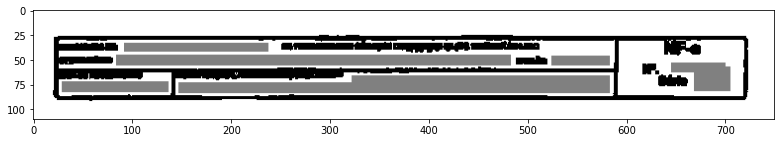

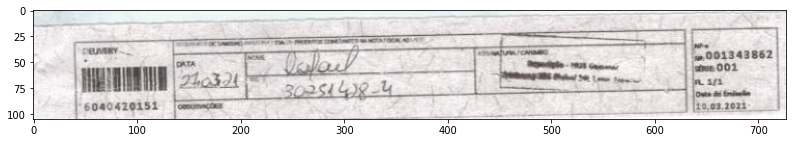

In [6]:
#TEMPLATE PADRÃO
template = cv2.imread("./imgs/m3.pgm")
plt.figure(figsize=(20,2))
plt.imshow(template)
amostra = cv2.imread("./imgs/m2_006.jpg")
plt.figure(figsize=(20,2))
plt.imshow(amostra)

**AJUSTANDO O TAMANHO DA IMAGEM**

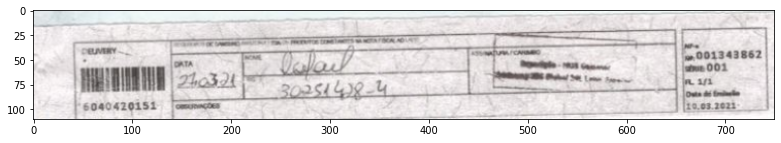

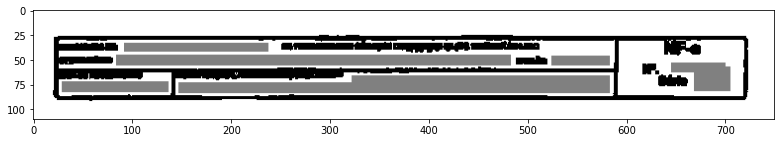

In [7]:
col, lin=template.shape[:2]
img = cv2.resize(amostra,(lin,col),interpolation = cv2.INTER_LINEAR)
plt.figure(figsize=(20,2))
plt.imshow(img)
plt.figure(figsize=(20,2))
plt.imshow(template)

In [8]:
ampliacao = (template.shape[1]*template.shape[0])/(amostra.shape[1]*amostra.shape[0])
print(f"O fator de ampliação é:{ampliacao}")

O fator de ampliação é:1.080762428767931


In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_edges = cv2.Canny(img_gray,100, 100, apertureSize=3)
lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

angles = []

for [[x1, y1, x2, y2]] in lines:
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
    angles.append(angle)

median_angle = np.median(angles)
img_rotated = ndimage.rotate(img, median_angle)

print(f"Angle is {median_angle:.04f}")
plt.figure(figsize=(20,10))
plt.imshow(template)
plt.figure(figsize=(20,10))
plt.imshow(img_rotated)


NameError: name 'math' is not defined

**APLICANDO TEMPLATE MATCHING**

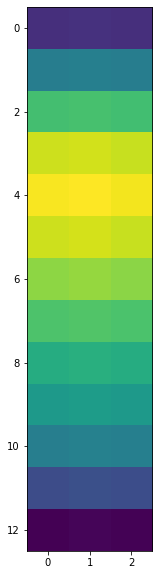

In [207]:
tp = cv2.matchTemplate(img_rotated,template,cv2.TM_CCOEFF_NORMED)
plt.figure(figsize=(20,10))
plt.imshow(tp)

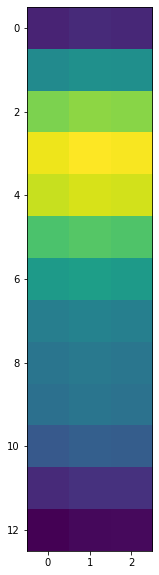

In [201]:
tp = cv2.matchTemplate(img_rotated,template,cv2.TM_CCOEFF_NORMED)
plt.figure(figsize=(20,10))
plt.imshow(tp)

In [202]:
tp

array([[-0.1466479 , -0.1446077 , -0.14522718],
       [-0.10923769, -0.10677756, -0.10734601],
       [-0.07732996, -0.07467603, -0.07533541],
       [-0.06041487, -0.05774058, -0.05856945],
       [-0.06603868, -0.06359413, -0.06463454],
       [-0.08585729, -0.08386125, -0.08507074],
       [-0.10280577, -0.10112803, -0.10253867],
       [-0.1142401 , -0.11259235, -0.11391594],
       [-0.11811174, -0.11640161, -0.11752336],
       [-0.12004709, -0.11818345, -0.11902747],
       [-0.12868884, -0.12664136, -0.127164  ],
       [-0.14460862, -0.14236155, -0.14240557],
       [-0.15638535, -0.15411061, -0.153926  ]], dtype=float32)